In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [2]:
from datasets import load_dataset # Import the load_dataset function from the datasets library
dataset1 = load_dataset("qazisaad/news_recommendations_base")
df= dataset1['train'].to_pandas()
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/604 [00:00<?, ?B/s]

(…)-00000-of-00001-22fad6cb21566616.parquet:   0%|          | 0.00/742k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3981 [00:00<?, ? examples/s]

,category,sub-category,title,times,url
0,lifestyle,lifestyle,Man tests biohacker Bryan Johnson's insane $2 ...,2023-10-09 02:27:36,https://news.google.com/rss/articles/CBMibGh0d...
1,lifestyle,lifestyle,Gestational diabetes care plan: Monitoring and...,2023-10-09 11:08:57,https://news.google.com/rss/articles/CBMiSGh0d...
2,lifestyle,lifestyle,10 ways to prevent type 2 diabetes at a young ...,2023-10-09 04:47:44,https://news.google.com/rss/articles/CBMidmh0d...
3,lifestyle,lifestyle,Tim Harford: The high price of our increasingl...,2023-10-07 05:00:43,https://news.google.com/rss/articles/CBMifWh0d...
4,lifestyle,lifestyle,The past year for Aspial Lifestyle (Catalist:5...,2023-10-09 07:26:05,https://news.google.com/rss/articles/CBMiUGh0d...
...,...,...,...,...,...
3976,northamerica,northamerica-video,Philadelphia video shows man smash car window ...,2023-10-05 20:01:35,https://news.google.com/rss/articles/CBMieWh0d...
3977,northamerica,northamerica-video,LANY Announce North America a beautiful blur T...,2023-10-04 14:55:35,https://news.google.com/rss/articles/CBMiYmh0d...
3978,northamerica,northamerica-video,Houck Group President Lin Sensenig Discusses H...,2023-10-06 07:04:23,https://news.google.com/rss/articles/CBMivQFod...
3979,northamerica,northamerica-video,Team USA Pursuing Jrue Holiday “Aggressively” ...,2023-10-09 10:50:40,https://news.google.com/rss/articles/CBMikAFod...


In [3]:
print(df.columns)  # Find the correct column name

Index(['category', 'sub-category', 'title', 'times', 'url'], dtype='object')


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.preprocessing import LabelEncoder
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
# Preprocessing Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())

    tokens = word_tokenize(text)

    cleaned = []
    for word in tokens:
        if word not in stop_words:  # Remove stopwords
            lemma = lemmatizer.lemmatize(word)  # Lemmatize
            syns = wordnet.synsets(lemma)
            if syns:
                cleaned.append(syns[0].lemmas()[0].name())
            else:
                cleaned.append(lemma)

    return " ".join(cleaned)  # Return the processed text as a string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
df['cleaned_title'] = df['title'].apply(preprocess_text)

In [6]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X = df['cleaned_title']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
def train_and_compare_models(df1, query, top_n):
    global models, tfidf, tokenizer, le, max_len, lstm_model, y_train, y_test, X_test_tfidf, X_test_pad

    all_labels = np.concatenate((y_train, y_test))
    if 'category_encoded' not in df1.columns:
        df1['category_encoded'] = le.fit_transform(df1['category'])
    # If the labels are numeric (already encoded), map them back using the original df
    if np.issubdtype(all_labels.dtype, np.number):
        # Create the label map using the newly created 'category_encoded'
        label_map = df1[['category', 'category_encoded']].drop_duplicates().set_index('category_encoded')['category'].to_dict()

        y_train = pd.Series(y_train).map(label_map).values
        y_test = pd.Series(y_test).map(label_map).values
        all_labels = np.concatenate((y_train, y_test))

    # Now label encode properly if needed
    le.fit(all_labels)
    y_test_encoded = le.transform(y_test) # Encode y_test here to define it


    # Preprocess query
    processed_query = preprocess_text(query)
    print("Processed query:", processed_query)

    # TF-IDF vectorize query
    query_tfidf = tfidf.transform([processed_query])

    # Predict
    model_predictions = {}
    for model_name, model in models.items():
        if model_name == 'LSTM':
            query_seq = tokenizer.texts_to_sequences([processed_query])
            query_pad = pad_sequences(query_seq, maxlen=max_len)
            predictions = np.argmax(model.predict(query_pad), axis=1)
        else:
            predictions = model.predict(query_tfidf)
        model_predictions[model_name] = predictions

    # Combine predictions
    all_predictions = [
        int(pred.item()) if isinstance(pred, np.ndarray) else int(pred)
        for pred in model_predictions.values()
    ]
    combined_prediction_encoded = Counter(all_predictions).most_common(1)[0][0]

    try:
        combined_prediction = le.inverse_transform([combined_prediction_encoded])[0]
    except Exception as e:
        print("⚠️ Decoding failed:", e)
        combined_prediction = str(combined_prediction_encoded)

    print("Predicted Category (decoded):", combined_prediction)
    print("Available categories in df1:", df1['category'].unique())

    # Match articles
    df1['category'] = df1['category'].astype(str)
    recommendations = df1[df1['category'] == combined_prediction].head(top_n)

    if recommendations.empty:
        print("⚠️ No exact match found. Trying partial match...")
        keyword = str(combined_prediction)
        mask = df1['category'].str.contains(keyword[:4], case=False, na=False)
        recommendations = df1[mask].head(top_n)

    print("Number of recommendations found:", len(recommendations))
    if recommendations.empty:
        print("⚠️ Still no recommendations found.")

    # Evaluate models
    results = {}
    for name, model in models.items():
        if name == 'LSTM':
            preds = np.argmax(model.predict(X_test_pad), axis=1)
        else:
            preds = model.predict(X_test_tfidf)

        preds = preds.astype(int) if preds.dtype.kind in 'f' else preds
        target_names = le.classes_.astype(str)
        results[name] = {
            'accuracy': accuracy_score(y_test_encoded, preds),
            'report': classification_report(y_test_encoded, preds, target_names=target_names)
        }

    return results, recommendations


In [9]:
!pip install -q scikit-learn imbalanced-learn


In [10]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Initialize the LabelEncoder and fit it to the 'category' column
le = LabelEncoder()
le.fit(df['category'])  # Fit the LabelEncoder to your categories

# STEP 3: TF-IDF Vectorization with Bigrams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # Bigrams (1, 2)
X = tfidf.fit_transform(df['cleaned_title'])  # Changed 'cleaned_text' to 'cleaned_title'
y = df['category']  # Changed 'label' to 'category' to align with the existing column

# Encode the target variable 'y' using the fitted LabelEncoder
y_encoded = le.transform(y)

# STEP 4: Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded) # Use encoded y

# STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# STEP 6: SVM Classifier with Hyperparameter Tuning
svm = SVC(kernel='linear', class_weight='balanced')

# Use GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Params:", grid_search.best_params_)

# Re-train the model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)



Best Params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=100, class_weight='balanced', gamma=0.01)

In [11]:
y_pred = best_svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Use the fitted LabelEncoder to get the target names
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8655778894472361
               precision    recall  f1-score   support

        autos       0.98      0.89      0.93        97
entertainment       0.84      0.85      0.84        91
      finance       0.84      0.77      0.80        95
 foodanddrink       0.84      0.91      0.87        88
       health       0.82      0.84      0.83        95
         kids       0.82      0.88      0.85        94
    lifestyle       0.69      0.70      0.70       100
   middleeast       0.99      0.97      0.98        78
       movies       0.95      0.95      0.95       103
        music       0.96      0.93      0.94        91
         news       0.72      0.65      0.69       104
 northamerica       0.97      1.00      0.98        91
       sports       0.88      0.86      0.87        96
       travel       0.89      0.89      0.89        95
           tv       0.85      0.93      0.89        83
        video       0.75      0.72      0.73        90
      weather       0.96      1.00 

In [12]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# --- LSTM ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# === TF-IDF Based Models (NB, RF, SVM) ===

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])

# TF-IDF with bigrams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
# Changed 'cleaned_text' to 'cleaned_title' to match the existing column in the DataFrame
X_tfidf = tfidf.fit_transform(df['cleaned_title'])
y = df['label']

# SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

# Train/test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# --- 1. Multinomial Naive Bayes ---
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)

# --- 2. Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)

# --- 3. SVM ---
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)

# --- Evaluation for all ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name} Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=le.classes_))

evaluate_model("Naive Bayes", y_test_tfidf, y_pred_nb)
evaluate_model("Random Forest", y_test_tfidf, y_pred_rf)
evaluate_model("SVM", y_test_tfidf, y_pred_svm)

# === 4. LSTM (Tokenization-based, not TF-IDF) ===

# Prepare tokenizer
max_words = 10000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
# Changed 'cleaned_text' to 'cleaned_title' to match the existing column in the DataFrame
tokenizer.fit_on_texts(df['cleaned_title'])

X_seq = tokenizer.texts_to_sequences(df['cleaned_title']) # Changed 'cleaned_text' to 'cleaned_title'
X_pad = pad_sequences(X_seq, maxlen=max_len)

# SMOTE requires dense arrays
X_pad_res, y_pad_res = smote.fit_resample(X_pad, y)

# Train/test split
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad_res, y_pad_res, test_size=0.2, random_state=42)

# One-hot encode labels for Keras
y_train_cat = to_categorical(y_train_pad, num_classes=len(le.classes_))
y_test_cat = to_categorical(y_test_pad, num_classes=len(le.classes_))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(len(le.classes_), activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate LSTM
y_pred_lstm = lstm_model.predict(X_test_pad)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)

evaluate_model("LSTM", y_test_pad, y_pred_lstm_classes)


🔍 Naive Bayes Accuracy: 0.8159547738693468
               precision    recall  f1-score   support

        autos       0.95      0.85      0.90        97
entertainment       0.79      0.70      0.74        91
      finance       0.76      0.78      0.77        95
 foodanddrink       0.78      0.85      0.82        88
       health       0.83      0.78      0.80        95
         kids       0.75      0.90      0.82        94
    lifestyle       0.72      0.52      0.60       100
   middleeast       0.82      0.97      0.89        78
       movies       0.90      0.97      0.93       103
        music       0.87      0.96      0.91        91
         news       0.77      0.47      0.58       104
 northamerica       0.85      0.95      0.90        91
       sports       0.82      0.85      0.84        96
       travel       0.86      0.87      0.87        95
           tv       0.77      0.88      0.82        83
        video       0.67      0.62      0.64        90
      weather       

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 95s 967ms/step - accuracy: 0.0925 - loss: 2.8223 - val_accuracy: 0.1915 - val_loss: 2.7044
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 135s 934ms/step - accuracy: 0.3333 - loss: 2.4570 - val_accuracy: 0.3391 - val_loss: 2.2617
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 929ms/step - accuracy: 0.5365 - loss: 1.6658 - val_accuracy: 0.3830 - val_loss: 2.2077
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 921ms/step - accuracy: 0.7218 - loss: 1.0367 - val_accuracy: 0.3878 - val_loss: 2.3599
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 928ms/step - accuracy: 0.8239 - loss: 0.6390 - val_accuracy: 0.3799 - val_loss: 2.5890
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step

🔍 LSTM Accuracy: 0.4057788944723618
               precision    recall  f1-score   support

        autos       0.65      0.56      0.60        97
entertainment       0.24      0.26      0.25        91
      finance       0.59      0.51      0.55        95
 foodanddrink       0.37      0.39      0.38        88
   

In [13]:
from xgboost import XGBClassifier

# --- 5. XGBoost ---
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=1,
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# --- Evaluation ---
evaluate_model("XGBoost", y_test_tfidf, y_pred_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:29:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost Accuracy: 0.8172110552763819
               precision    recall  f1-score   support

        autos       0.95      0.77      0.85        97
entertainment       0.77      0.75      0.76        91
      finance       0.82      0.71      0.76        95
 foodanddrink       0.83      0.88      0.85        88
       health       0.81      0.73      0.77        95
         kids       0.82      0.85      0.84        94
    lifestyle       0.59      0.69      0.64       100
   middleeast       0.97      0.90      0.93        78
       movies       0.93      0.97      0.95       103
        music       0.92      0.90      0.91        91
         news       0.59      0.62      0.61       104
 northamerica       0.93      0.96      0.94        91
       sports       0.84      0.82      0.83        96
       travel       0.83      0.86      0.85        95
           tv       0.83      0.88      0.85        83
        video       0.65      0.68      0.66        90
      weather       0.93

In [14]:
pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [15]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# --- 6. LightGBM ---
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_lgbm = lgbm_model.predict(X_test_tfidf)
evaluate_model("LightGBM", y_test_tfidf, y_pred_lgbm)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19242
[LightGBM] [Info] Number of data points in the train set: 6364, number of used features: 982
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.83321

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🔍 LightGBM Accuracy: 0.8059045226130653
               precision    recall  f1-score   support

        autos       0.83      0.85      0.84        97
entertainment       0.70      0.77      0.73        91
      finance       0.76      0.68      0.72        95
 foodanddrink       0.81      0.82      0.81        88
       health       0.82      0.71      0.76        95
         kids       0.80      0.88      0.84        94
    lifestyle       0.62      0.73      0.67       100
   middleeast       0.99      0.87      0.93        78
       movies       0.94      0.96      0.95       103
        music       0.91      0.91      0.91        91
         news       0.57      0.51      0.54       104
 northamerica       0.95      0.97      0.96        91
       sports       0.81      0.79      0.80        96
       travel       0.82      0.84      0.83        95
           tv       0.86      0.88      0.87        83
        video       0.64      0.62      0.63        90
      weather       0.9

In [16]:
# --- 7. CatBoost (Silent Mode) ---
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_cat = cat_model.predict(X_test_tfidf)
evaluate_model("CatBoost", y_test_tfidf, y_pred_cat)


🔍 CatBoost Accuracy: 0.8015075376884422
               precision    recall  f1-score   support

        autos       0.85      0.79      0.82        97
entertainment       0.88      0.70      0.78        91
      finance       0.84      0.71      0.77        95
 foodanddrink       0.82      0.85      0.84        88
       health       0.86      0.77      0.81        95
         kids       0.81      0.86      0.84        94
    lifestyle       0.74      0.51      0.60       100
   middleeast       0.97      0.90      0.93        78
       movies       0.92      0.95      0.93       103
        music       0.89      0.87      0.88        91
         news       0.41      0.73      0.52       104
 northamerica       0.95      0.97      0.96        91
       sports       0.81      0.86      0.84        96
       travel       0.87      0.81      0.84        95
           tv       0.80      0.89      0.84        83
        video       0.69      0.53      0.60        90
      weather       0.9

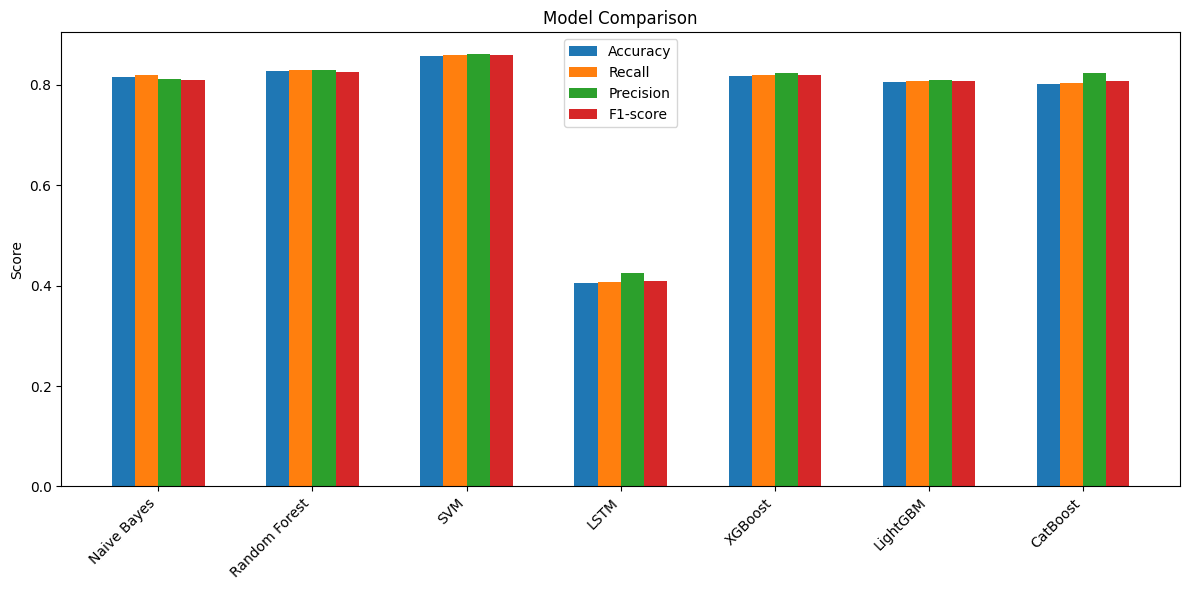

In [17]:
# prompt: give me a plot of all models comparsion (include accuracy , recall, precision, f1score)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

model_names = [
    'Naive Bayes', 'Random Forest', 'SVM',
    'LSTM', 'XGBoost', 'LightGBM', 'CatBoost'
]

def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, report['macro avg']['recall'], report['macro avg']['precision'], report['macro avg']['f1-score']


model_metrics = []
model_metrics.append(get_metrics(y_test_tfidf, y_pred_nb))
model_metrics.append(get_metrics(y_test_tfidf, y_pred_rf))
model_metrics.append(get_metrics(y_test_tfidf, y_pred_svm))
model_metrics.append(get_metrics(y_test_pad, y_pred_lstm_classes))
model_metrics.append(get_metrics(y_test_tfidf, y_pred_xgb))
model_metrics.append(get_metrics(y_test_tfidf, y_pred_lgbm))
model_metrics.append(get_metrics(y_test_tfidf, y_pred_cat))


metrics = ['Accuracy', 'Recall', 'Precision', 'F1-score']
x = range(len(model_names))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    values = [m[i] for m in model_metrics]
    ax.bar([p + width * i for p in x], values, width, label=metric)

ax.set_xticks([p + 1.5*width for p in x])
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.tight_layout()
plt.show()


In [46]:
query = input("Enter the type of news you need: ")
n = int(input("Number of news articles needed: "))
_, recommendations = train_and_compare_models(df, query=query, top_n=n)

print("\nRecommended Articles:")
print(recommendations[['title', 'url']])


Enter the type of news you need: entertainment
Number of news articles needed: 10
Processed query: entertainment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted Category (decoded): entertainment
Available categories in df1: ['lifestyle' 'news' 'health' 'weather' 'entertainment' 'autos' 'travel'
 'sports' 'foodanddrink' 'tv' 'movies' 'finance' 'video' 'music'
 'middleeast' 'kids' 'northamerica']
Number of recommendations found: 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Recommended Articles:
                                                  title  \
1205  Gigi Hadid and Bradley Cooper enjoy night out ...   
1206  'The Walking Dead: Daryl Dixon' showrunner exp...   
1207  TUI Cruises Unveils Entertainment Onboard 2024...   
1208  Why Roy Wood Jr. Leaving ‘The Daily Show' Matt...   
1209  Entertainment a goal for Fairborn's re-use of ...   
1210  One dead, two injured during early morning sho...   
1211  A Bird in Winter by Louise Doughty review – ef...   
1212  Major security changes coming to local enterta...   
1213  AP Top Entertainment News at 7:17 a.m. EDT - Y...   
1214  Queen Elizabeth died with deep wound given by ...   

                                                    url  
1205  https://news.google.com/rss/articles/CBMiWGh0d...  
1206  https://news.google.com/rss/articles/CBMiR2h0d...  
1207  https://news.google.com/rss/articles/CBMia2h0d...  
1208  https://news.google.com/rss/articles/CBMiUGh0d...  
1209  https://news.google.com/rss/art